In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [2]:
start_year = 2012
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [3]:
close_price = code_dat.loc[:, 'Close']

In [18]:
up = (close_price - close_price.shift(1)).dropna()
down = (close_price.shift(1) - close_price).dropna()

In [19]:
up = up.where(up>0, 0)
down = down.where(down>0, 0)

In [20]:
up_smma = up.ewm(com=26).mean()
down_smma = down.ewm(com=26).mean()

In [23]:
rs = up_smma/down_smma
rsi = 100 - 100/(1+rs)

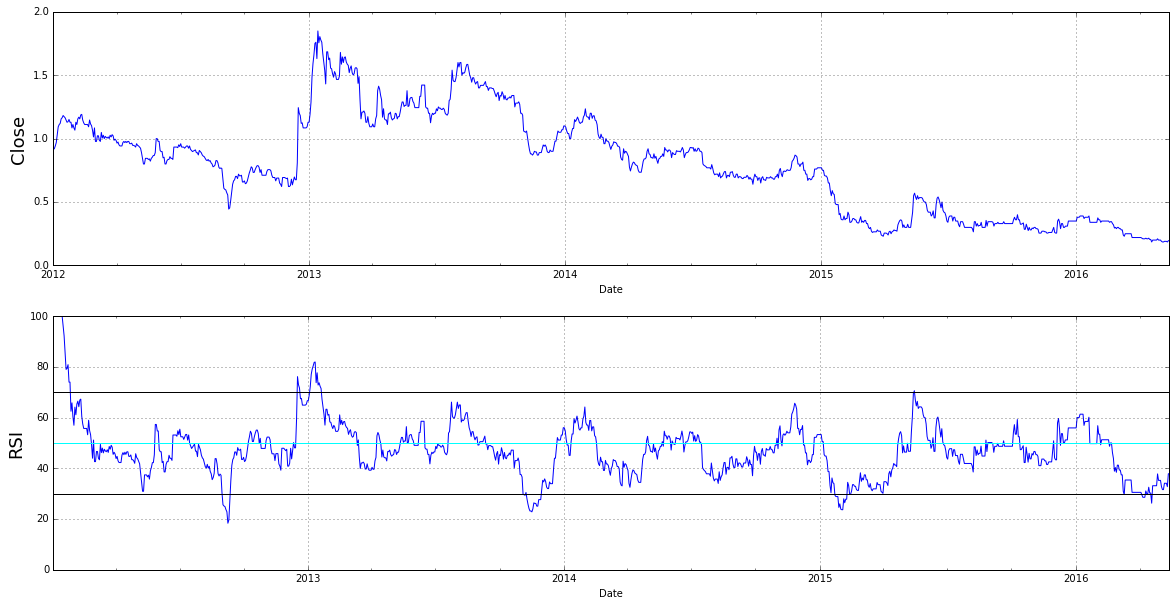

In [39]:
plt.figure(figsize=(20, 10))
ax_up = plt.subplot(211)
close_price.plot(ax=ax_up)
ax_up.set_ylabel('Close', fontsize=18)
plt.grid()
ax_down = plt.subplot(212)
rsi.plot(ax=ax_down)
ax_down.set_ylabel('RSI', fontsize=18)
plt.ylim((0, 100))
x_lim = ax_down.get_xlim()
plt.plot(x_lim, (50, 50), color='cyan')
plt.plot(x_lim, (30, 30), color='k')
plt.plot(x_lim, (70, 70), color='k')
plt.grid()